### Part 1: Basic, no geography tree

In [ ]:
# imports
import pandas as pd


In [79]:
# getting the data
data_ng = pd.read_csv(r"C:\Users\Evan\Desktop\_data\prepro_data.csv")

In [80]:
type(data_ng)

pandas.core.frame.DataFrame

In [81]:
data_ng.head()

,case_month,state_fips_code,county_fips_code,age_group,sex,race,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_positive_specimen,underlying_conditions_yn
0,2020-10,49,49035.0,2,1,5,0,1,1,1,0,0,0,0,1
1,2021-01,49,49057.0,1,1,5,0,1,1,1,0,0,0,0,1
2,2021-02,22,22009.0,2,1,5,0,1,0,1,0,-1,-2,0,1
3,2020-11,42,42025.0,1,1,5,0,1,1,1,0,0,-3,0,1
4,2020-07,42,42003.0,1,1,2,0,1,1,1,0,0,0,1,1


In [82]:
# for preliminary reasons, I will drop date, county/area info, and icu/death info
data_ng.drop(['case_month','state_fips_code','county_fips_code','icu_yn','death_yn'], axis = 1, inplace = True)

In [83]:
data_ng.head()

,age_group,sex,race,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,case_positive_specimen,underlying_conditions_yn
0,2,1,5,0,1,1,1,0,0,1
1,1,1,5,0,1,1,1,0,0,1
2,2,1,5,0,1,0,1,0,0,1
3,1,1,5,0,1,1,1,0,0,1
4,1,1,2,0,1,1,1,0,1,1


In [84]:
data_ng.shape

(123111, 10)

In [85]:
# dropping unkown and missing hosp data - where hosp = -1 or -2
data_ng.drop(data_ng[(data_ng['hosp_yn'] == -1) | (data_ng['hosp_yn'] == -2)].index, inplace = True)

In [86]:
data_ng.shape

(113754, 10)

In [87]:
# now that all of hosp_yn is 1 or 0, I will do a prelim. tree model 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# select X data
X = np.array( data_ng.drop(['hosp_yn'],axis = 1, inplace = False) )
y = np.array (data_ng['hosp_yn'] )

In [88]:
# now split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .2,random_state = 1)

In [93]:
# now build the tree model
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree = dtree.fit(X_train, y_train)
print("classifier accuracy:",dtree.score(X_test,y_test))

classifier accuracy: 0.9138279636059954


In [99]:
# some count testing - see what percentage of patients in remaining data are hospitilized - about %8.5
print(len(y))
np.count_nonzero(y)

print(np.count_nonzero(y)/len(y))

113754
0.08535963570511806


[Text(0.5, 0.875, 'X[0] <= 2.5\ngini = 0.151\nsamples = 22750\nvalue = [20880, 1870]'),
 Text(0.25, 0.625, 'X[0] <= 1.5\ngini = 0.091\nsamples = 17811\nvalue = [16961, 850]'),
 Text(0.125, 0.375, 'X[0] <= 0.5\ngini = 0.062\nsamples = 12048\nvalue = [11660, 388]'),
 Text(0.0625, 0.125, 'gini = 0.019\nsamples = 1594\nvalue = [1579, 15]'),
 Text(0.1875, 0.125, 'gini = 0.069\nsamples = 10454\nvalue = [10081, 373]'),
 Text(0.375, 0.375, 'X[5] <= 0.5\ngini = 0.147\nsamples = 5763\nvalue = [5301, 462]'),
 Text(0.3125, 0.125, 'gini = 0.072\nsamples = 1144\nvalue = [1101, 43]'),
 Text(0.4375, 0.125, 'gini = 0.165\nsamples = 4619\nvalue = [4200, 419]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\ngini = 0.328\nsamples = 4939\nvalue = [3919, 1020]'),
 Text(0.625, 0.375, 'X[1] <= 0.5\ngini = 0.18\nsamples = 821\nvalue = [739, 82]'),
 Text(0.5625, 0.125, 'gini = 0.13\nsamples = 457\nvalue = [425, 32]'),
 Text(0.6875, 0.125, 'gini = 0.237\nsamples = 364\nvalue = [314, 50]'),
 Text(0.875, 0.375, 'X[2] <= 1.5\ng

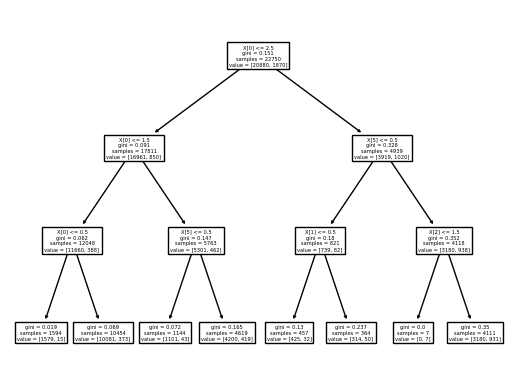

In [90]:
# view the tree
tree.plot_tree(dtree)

# Part 2: Basic, no geo Random Forest


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, random_state=42)
forest_clf.fit(X_train, y_train)

y_pred = forest_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9138499406619489


# Part 3: Basic Feature Selection

### Part 3.1: Feature viewing

In [108]:
# feature importance
from matplotlib import pyplot as plt
forest_clf.feature_importances_

array([0.75541659, 0.02640126, 0.02905312, 0.01657437, 0.01411215,
       0.10066128, 0.        , 0.04430339, 0.01347785])

<BarContainer object of 9 artists>

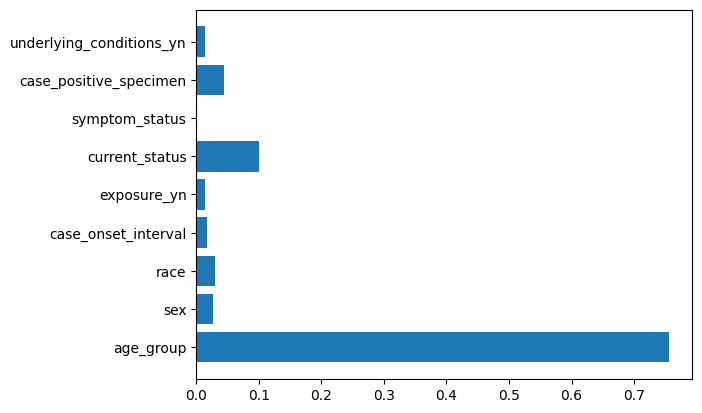

In [125]:
# visualize the attribute importances

cols = np.array(list(data_ng.columns))
# plt.barh(cols,np.array(forest_clf.feature_importances_))
cols = np.delete(cols,7)

plt.barh(cols,np.array(forest_clf.feature_importances_))

In [126]:
# testing what happens if we only keep the top 4 attributes
# drop sex, case_onset_interval, exposure_yn, symptom status, underlying conditions
data_ng2 = data_ng.drop(['sex','case_onset_interval','exposure_yn','symptom_status','underlying_conditions_yn'],
                        axis = 1, inplace = False)

data_ng2.head()

,age_group,race,current_status,hosp_yn,case_positive_specimen
0,2,5,1,0,0
1,1,5,1,0,0
2,2,5,0,0,0
3,1,5,1,0,0
4,1,2,1,0,1


In [138]:
# now retest the tree
# select X data
X = np.array( data_ng2.drop(['hosp_yn'],axis = 1, inplace = False) )
# X = np.array(data_ng2['age_group'])
y = np.array(data_ng2['hosp_yn'] )
# now split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .2,random_state = 1)
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree = dtree.fit(X_train, y_train)
print("classifier accuracy:",dtree.score(X_test,y_test))

classifier accuracy: 0.9138279636059954
